In [1]:
import numpy as np
from os.path import join
from flyeye.data.experiments import Experiment
from figures.dynamics import Expression    
from figures.comparison import VerticalBoxplot
from figures.scatter import DualJointDistribution
%matplotlib inline

data_path = '../data/published'

# Load wildtype data

In [2]:
# define path to wildtype data
path = join(data_path, 'wildtype')

# load data
wildtype = Experiment(path, 0, align_by='ch2_normalized')

# add P/Y ratio to cell data
wildtype.set_ratio('ch1_normalized', 'ch2_normalized')

# Figure 2 A-F

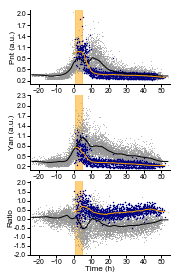

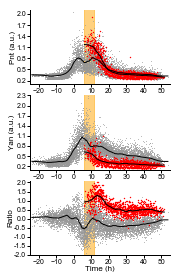

In [3]:
# Fig 2ACE
fig2ACE = Expression(wildtype)
r2r5 = [['r2', 'r5']]
fig2ACE.render_all_channels(r2r5, scatter=True, shading='orange')

# Fig 2BDF
fig2BDF = Expression(wildtype)
r1r6 = [['r1', 'r6']]
fig2BDF.render_all_channels(r1r6, scatter=True, shading='orange')

# Figure 2 G

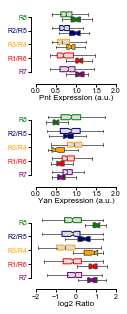

In [4]:
fig2G = VerticalBoxplot.from_experiment(wildtype)
fig2G.render()

In [5]:
df = fig2G.df[fig2G.df.Metric=='Pnt']
gb = df.groupby(['ReferenceType', 'Population'])

In [6]:
gb['centroid_x'].count()

ReferenceType  Population    
R1/R6          Differentiated     36
               Multipotent       260
R2/R5          Differentiated     36
               Multipotent       153
R3/R4          Differentiated     36
               Multipotent       270
R7             Differentiated     36
               Multipotent       487
R8             Differentiated     36
               Multipotent       275
Name: centroid_x, dtype: int64

# Figure 2 H,I

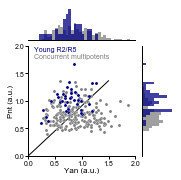

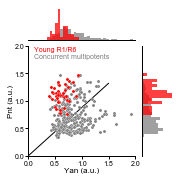

In [7]:
fig2H = DualJointDistribution.from_experiment(wildtype, ['r2', 'r5'])
fig2H.render()

fig2I = DualJointDistribution.from_experiment(wildtype, ['r1', 'r6'])
fig2I.render()

# Figure S2 A,B

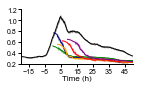

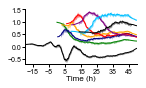

In [8]:
# define cell types
neurons = [['r8'],['r2','r5'],['r3','r4'],['r1','r6'],['r7']]
cones = [['c1', 'c2'], ['c3', 'c4']]

# define number of bootstrap samples (10k used for manuscript)
interval_kw = dict(nbootstraps=10) 

# Fig S2A
figS2A = Expression(wildtype)
ax_kw = dict(xlim=(-20, 50), ylim=(.2, 1.2), yticks=np.arange(.2, 1.3, .2))
figS2A.render('ch2_normalized', neurons, interval=True, ax_kw=ax_kw, interval_kw=interval_kw)

# Fig S2B
figS2B = Expression(wildtype)
group2 = [['r1', 'r6'], ['r7']]
ax_kw = dict(xlim=(-20, 50), ylim=(-.7, 1.5), yticks=np.arange(-.5, 1.6, .5))
figS2B.render('logratio', neurons+cones, interval=True, ax_kw=ax_kw, interval_kw=interval_kw)

# Figure S2 C-G

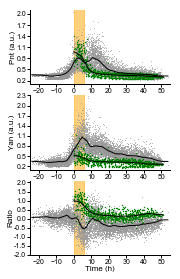

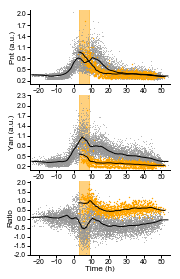

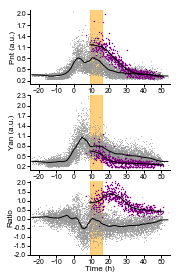

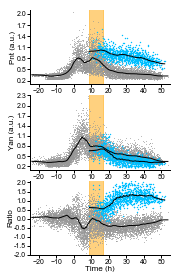

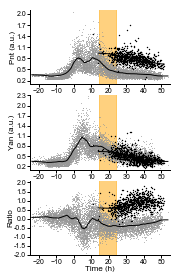

In [9]:
cell_types = [['r8'],['r3','r4'],['r7'],['c1', 'c2'], ['c3', 'c4']]
for i in range(5):
    fig = Expression(wildtype)
    fig.render_all_channels([cell_types[i]], scatter=True, shading='orange')

# Figure S3

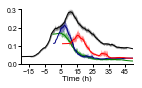

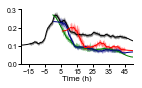

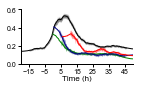

In [10]:
# define cell types
neurons = [['r8'],['r2','r5'],['r1','r6']]

# define number of bootstrap samples (10k used for manuscript)
interval_kw = dict(nbootstraps=10) 

# Fig S3A
figS3A = Expression(wildtype)
ax_kw = dict(xlim=(-20, 50), ylim=(0, .3), yticks=np.arange(0, .35, .1))
figS3A.render('ch1_normalized_flux', neurons, interval=True, ax_kw=ax_kw, interval_kw=interval_kw)

# Fig S3B
figS3B = Expression(wildtype)
ax_kw = dict(xlim=(-20, 50), ylim=(0, .3), yticks=np.arange(0, .35, .1))
figS3B.render('ch2_normalized_flux', neurons, interval=True, ax_kw=ax_kw, interval_kw=interval_kw)

# Fig S3C
figS3C = Expression(wildtype)
ax_kw = dict(xlim=(-20, 50), ylim=(0, .6), yticks=np.arange(0, .65, .2))
figS3C.render('logratio_flux', neurons, interval=True, ax_kw=ax_kw, interval_kw=interval_kw)